In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [32]:
sns.set(style="whitegrid")

df = pd.read_csv("../data/train.csv")


In [33]:
# Basic stats
print(df.describe(include='all').T)
print("Missing values:\n", df.isnull().sum())

              count unique             top freq       mean         std   min  \
PassengerId  1000.0    NaN             NaN  NaN      500.5  288.819436   1.0   
Survived     1000.0    NaN             NaN  NaN      0.368    0.482503   0.0   
Pclass       1000.0    NaN             NaN  NaN      2.327    0.847815   1.0   
Name           1000   1000  Passenger_1000    1        NaN         NaN   NaN   
Sex             951      3            male  603        NaN         NaN   NaN   
Age           950.0    NaN             NaN  NaN  30.860316   16.411846   0.0   
SibSp        1000.0    NaN             NaN  NaN      1.942    1.419384   0.0   
Parch        1000.0    NaN             NaN  NaN      2.032    1.418798   0.0   
Fare          950.0    NaN             NaN  NaN  57.944832   98.126719  0.11   
Embarked        950      4               S  670        NaN         NaN   NaN   

                25%    50%     75%     max  
PassengerId  250.75  500.5  750.25  1000.0  
Survived        0.0    0.0   

In [ ]:
# fill the null value with mean for numerical and mode for categorical
int_column = df.select_dtypes("int64")
float_column = df.select_dtypes("float64")
cat_column = df.select_dtypes("object")

df[int_column.columns] = int_column.fillna(int_column.mean())
df[float_column.columns] = float_column.fillna(float_column.mean())
df[cat_column.columns] = cat_column.fillna(cat_column.mode().iloc[0])
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

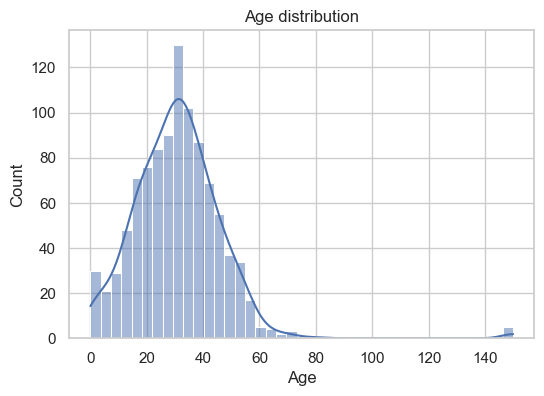

In [35]:
# 1) Histogram: Age
plt.figure(figsize=(6,4))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title("Age distribution")
plt.xlabel("Age")
plt.show()

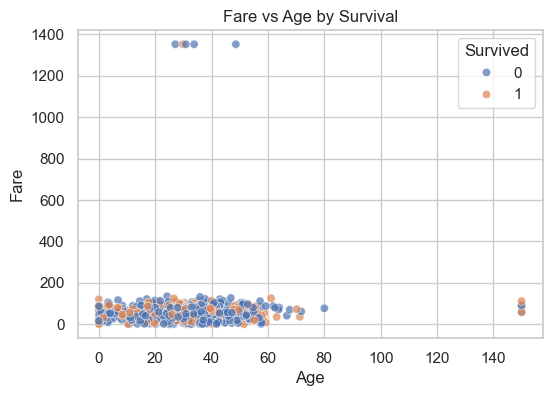

In [36]:
# 2) Scatter: Fare vs Age colored by Survived
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', alpha=0.7)
plt.title("Fare vs Age by Survival")
plt.show()

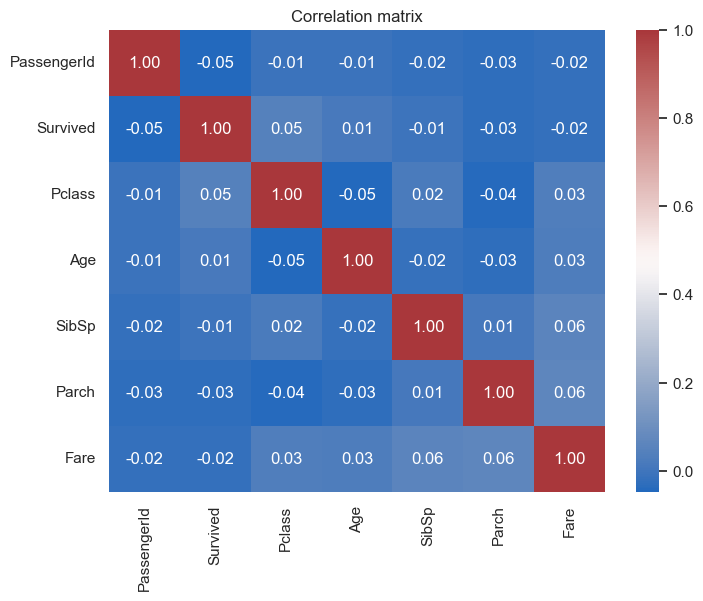

In [37]:
# 3) Correlation heatmap (numeric only)
plt.figure(figsize=(8,6))
corr = df.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag")
plt.title("Correlation matrix")
plt.show()

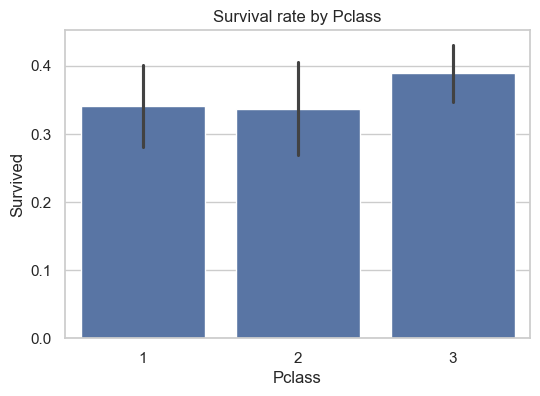

In [38]:
# Additional: class vs survival bar plot
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival rate by Pclass")
plt.show()